<a href="https://colab.research.google.com/github/swat90/Omdena_Advanced_ML_DS/blob/main/Assignment3_Part1_Swati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning (Part 1) - Practical Assessment

## Task 1: Understanding Supervised Learning

### Define Supervised Learning: Provide a concise definition of supervised learning and explain its role in machine learning.

**Supervised learning** is a machine learning paradigm in which an algorithm learns from labeled training data to make predictions or decisions. The term "supervised" refers to the process of the algorithm being guided by a supervisor or teacher, where the training dataset consists of input-output pairs. The algorithm generalizes from this labeled data to make predictions or classifications on new, unseen data.

**Role in Machine Learning**:
In supervised learning, the primary goal is to learn a mapping from input data to the corresponding output labels. The training process involves adjusting the algorithm's parameters based on the known outcomes provided in the training dataset. Once trained, the model can make predictions on new, previously unseen data.

Supervised learning is widely used for tasks such as classification and regression. In classification, the algorithm assigns predefined labels to input data, while in regression, it predicts a continuous output. Common applications include spam detection, image recognition, speech recognition, and predicting numerical values like stock prices.

### Types of Supervised Learning:
### *   Differentiate between classification and regression tasks.
### *   Provide two examples for each type, explaining the nature of input features and target labels.

**Classification Tasks:**
In classification tasks, the goal is to categorize input data into predefined classes or categories. The output is a discrete label or class. Here are two examples:

**Spam Email Detection:**
   - **Input Features:** Email content, sender, time received, etc.
   - **Target Labels:** Binary labels indicating whether the email is spam (1) or not spam (0).

**Handwritten Digit Recognition:**
   - **Input Features:** Pixel values of an image representing a handwritten digit.
   - **Target Labels:** Numerical labels (0 to 9) representing the recognized digit.

**Regression Tasks:** In regression tasks, the goal is to predict a continuous numerical value based on input data. The output is a real number rather than a category. Here are two examples:

**House Price Prediction:**
   - **Input Features:** Square footage, number of bedrooms, location, etc.
   - **Target Labels:** The predicted price of the house in dollars.

**Temperature Prediction:**
   - **Input Features:** Date, time of day, humidity, etc.
   - **Target Labels:** The predicted temperature in degrees Celsius or Fahrenheit.


## Task 2: Classification Algorithms (Decision Trees, Naïve Bayes)

### Decision Trees:
### *  Implement a decision tree classifier using Scikit-Learn with a provided dataset.
### *  Evaluate the model's performance and discuss the key decisions made by the tree.


In [3]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
#Load the dataset in pandas dataframe
train = pd.read_csv(r"/content/drive/MyDrive/Omdena_ML_DS/train.csv") #training data

#Info on both the datasets
train.info()

#Train data has 165034 entries and 14 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


Data cleaning and preprocessing

In [ ]:
#check for duplicates in both train and test
dupli_train = train.duplicated().sum()
print(dupli_train)
#no duplicates

0


In [ ]:
#check for missing values
print(train.isna().sum())
#no missing values

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
#drop columns with private information of customers
train = train.drop(["id", "CustomerId", "Surname"], axis = 1)

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB
None


In [ ]:
#separate out numerical and categorical columns
numeric_col = train.select_dtypes(include = "number").columns
print(numeric_col)

categoric_col = train.select_dtypes(exclude = "number").columns
print(categoric_col)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Index(['Geography', 'Gender'], dtype='object')


In [ ]:
#check unique values in categorical columns
train[categoric_col].nunique()
#Gender has 2 and Geography has 3 unqiue values

Geography    3
Gender       2
dtype: int64

In [ ]:
print(train['Geography'].value_counts())
print(train['Gender'].value_counts())

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64
Male      93150
Female    71884
Name: Gender, dtype: int64


In [ ]:
#Identify and handle outliers in teh data
# Define the outlier criteria
# using the IQR method to identify outliers
def outlier(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[column] < lower_limit) | (dataset[column] > upper_limit)]
    return outliers[column].count()

for i in numeric_col:
  outlier_count = outlier(train, i)
  print(f"Number of outliers in {i}: {outlier_count}")

#There is no menaing of outliers in Number of products, Exited and Has credit card columns
#Age and Credit score has outliers

Number of outliers in CreditScore: 253
Number of outliers in Age: 6394
Number of outliers in Tenure: 0
Number of outliers in Balance: 0
Number of outliers in NumOfProducts: 475
Number of outliers in HasCrCard: 40606
Number of outliers in IsActiveMember: 0
Number of outliers in EstimatedSalary: 0
Number of outliers in Exited: 34921


In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
#Use winsorization to handle outliers
from feature_engine.outliers import Winsorizer

# Fit and transform the specified columns
for column in ["CreditScore", "Age"]:
    winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[column])
    train[column] = winsorizer.fit_transform(train[[column]])

outlier_count_CS = outlier(train, "CreditScore")
outlier_count_age = outlier(train, "Age")
print(outlier_count_CS, outlier_count_age)
#Successfully removed outliers

0 0


In [ ]:
# Columns to reomve from numeric features for further pre processing
cols_to_remove = ['HasCrCard', 'IsActiveMember', 'Exited']

# update the list
numeric_cols_pre = [col for col in numeric_col if col not in cols_to_remove]

#also update list of categorical features
categorical_cols_pre = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

print(numeric_cols_pre, categorical_cols_pre)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']


In [ ]:
#Define the peipelines for numeric and categoric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_pre),
        ('cat', categorical_transformer, categorical_cols_pre)
    ])

In [ ]:
#Separte out X and y
X = train.drop(["Exited"], axis = 1)
y = train["Exited"]
print(X.shape, y.shape)

(165034, 10) (165034,)


In [ ]:
# Pre processing for X features
processed_data = preprocessor.fit_transform(X)

# Get the column names after transformation
processed_numeric_cols = preprocessor.transformers_[0][1]['scaler'].get_feature_names_out(numeric_cols_pre)
processed_categorical_cols = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols_pre)
all_processed_cols = list(processed_numeric_cols) + list(processed_categorical_cols)

# Convert to DataFrame with column names
processed_df = pd.DataFrame(processed_data, columns=all_processed_cols)
processed_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,0.143908,-0.596933,-0.719973,-0.883163,0.814298,1.369486,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,-0.368605,-0.596933,-1.432694,-0.883163,0.814298,-1.254085,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.268911,0.258796,1.774548,-0.883163,0.814298,1.437422,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-0.943620,-0.474686,-1.076334,1.486918,-1.013348,-0.557018,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.743923,-0.596933,-0.007253,-0.883163,0.814298,-1.938770,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test= train_test_split(processed_df, y, test_size=.2,random_state=42, stratify=y)

Decision tree

accuracy_score 0.7962250431726603
Precision Score 0.5177197802197803
Recall Score 0.5396620847651775
F1 Score 0.5284632641615256


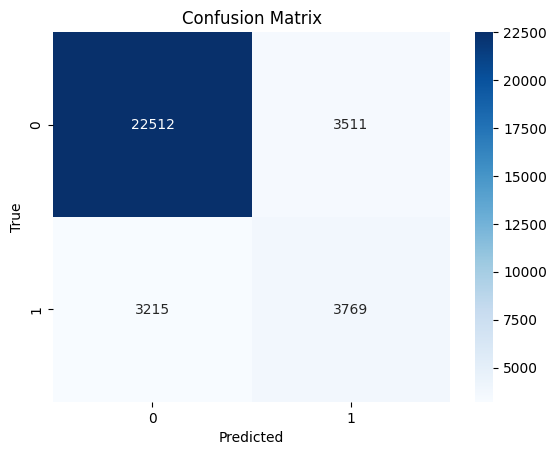

In [ ]:
# Create a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print('accuracy_score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Naïve Bayes:
*   Implement a Naïve Bayes classifier with the same dataset.
*   Compare the performance of the Naïve Bayes classifier with the decision tree.


accuracy_score 0.8120095737267852
Precision Score 0.5594747289662544
Recall Score 0.5246277205040092
F1 Score 0.5414911697332446


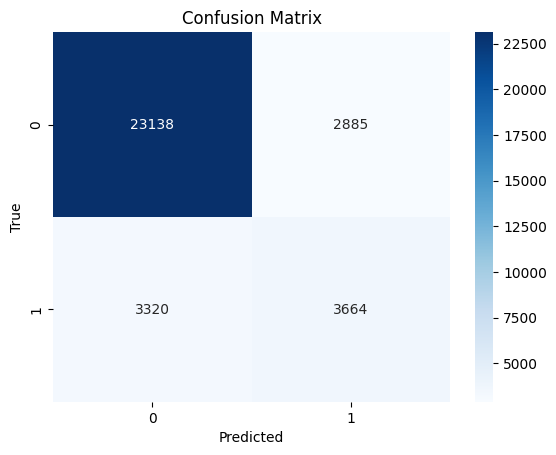

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
print('accuracy_score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))
print('Recall Score', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Conclusion: Naive Bayes algorithm is performing better than decision tree. It has better accuracy, precision and F1 score.

## Task 3: Regression Algorithms (Linear Regression)

### Linear Regression Basics:
### *   Implement a linear regression model using a sample dataset provided.
### *   Display and interpret the regression line and coefficients.
### Model Evaluation in Regression:
### ●	Evaluate the linear regression model using appropriate metrics (e.g., Mean Squared Error).
### ●	Discuss the practical implications of the model's performance.


In [4]:
#Load the dataset
car = pd.read_csv(r"/content/drive/MyDrive/OASIS/car data.csv")
car.info() #301 entries, 9 columns, three integer, two float and 4 object data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# Convert 'Year' to datetime format
car['Year'] = pd.to_datetime(car['Year'], format='%Y')

In [6]:
#Check for duplicates
print(car.duplicated().sum())#2 duplicates

car = car.drop_duplicates()
car.shape #299, 9

2


(299, 9)

In [22]:
#Missing values
car.isnull().sum() #no missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Check the correlation b/w all the columns including categorical ones

In [23]:
!pip install dython

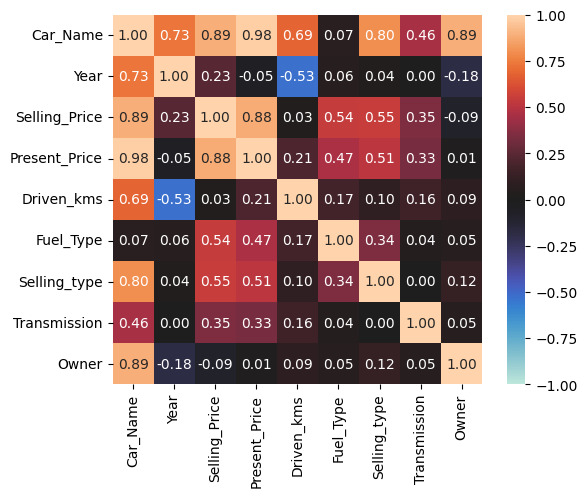

In [24]:
from dython.nominal import associations
correlation_matrix = associations(car, nominal_columns=['Selling_type', 'Fuel_Type', 'Transmission', 'Car_Name'])

In [7]:
#Drop columns on the basis of correlations
car1 = car.drop(['Car_Name'], axis = 1)
car1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           299 non-null    datetime64[ns]
 1   Selling_Price  299 non-null    float64       
 2   Present_Price  299 non-null    float64       
 3   Driven_kms     299 non-null    int64         
 4   Fuel_Type      299 non-null    object        
 5   Selling_type   299 non-null    object        
 6   Transmission   299 non-null    object        
 7   Owner          299 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 21.0+ KB


In [8]:
# Creating a new feature called total no. of years old car as we can't send year format directly into simple ML models.
car1['Car_age'] = 2023 - car1['Year'].dt.year

#It's time to drop the Year column after the needed info is derived.
car1.drop(labels='Year',axis=1,inplace=True)
car1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  299 non-null    float64
 1   Present_Price  299 non-null    float64
 2   Driven_kms     299 non-null    int64  
 3   Fuel_Type      299 non-null    object 
 4   Selling_type   299 non-null    object 
 5   Transmission   299 non-null    object 
 6   Owner          299 non-null    int64  
 7   Car_age        299 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.0+ KB


In [9]:
car_f = pd.get_dummies(car1,drop_first=True)
car_f.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [10]:
#Use MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
car_f_scaled = scaler.fit_transform(car_f)
car_f_scaled = pd.DataFrame(car_f_scaled, columns=car_f.columns)

# Now car_f_scaled contains the scaled values
car_f_scaled.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,0.093123,0.057109,0.053053,0.0,0.266667,0.0,1.0,0.0,1.0
1,0.133238,0.099913,0.085085,0.0,0.333333,1.0,0.0,0.0,1.0
2,0.204871,0.103273,0.012813,0.0,0.066667,0.0,1.0,0.0,1.0
3,0.078797,0.041504,0.009409,0.0,0.466667,0.0,1.0,0.0,1.0
4,0.128940,0.070980,0.083984,0.0,0.266667,1.0,0.0,0.0,1.0


In [11]:
#split into dependent and independent variables
X = car_f_scaled.drop('Selling_Price', axis=1)
y = car_f_scaled['Selling_Price']

P-Value - P values are one of the best ways to determine if a variable is redundant(useful or not) but they provide no information. If a variable has a p-values >0.05, we can disregard it.

In [12]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression, SelectKBest
f_regression(X,y)

p_values = f_regression(X, y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method

array([0.   , 0.623, 0.129, 0.   , 0.   , 0.   , 0.   , 0.   ])

In [13]:
#Driven_kms and owner has pvalue >0.5, we can drop them both
X_f = X.drop(["Driven_kms", "Owner"], axis =1)
X_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Present_Price            299 non-null    float64
 1   Car_age                  299 non-null    float64
 2   Fuel_Type_Diesel         299 non-null    float64
 3   Fuel_Type_Petrol         299 non-null    float64
 4   Selling_type_Individual  299 non-null    float64
 5   Transmission_Manual      299 non-null    float64
dtypes: float64(6)
memory usage: 14.1 KB


In [14]:
#Split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_f, y, test_size=0.25, random_state=365)

In [15]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [16]:
print(x_train.shape, y_train.shape)

(224, 6) (224,)


Coefficient (slope): 1.41
Intercept: 0.06


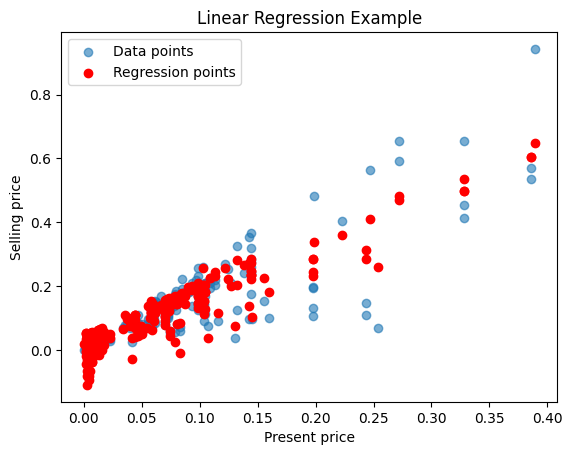

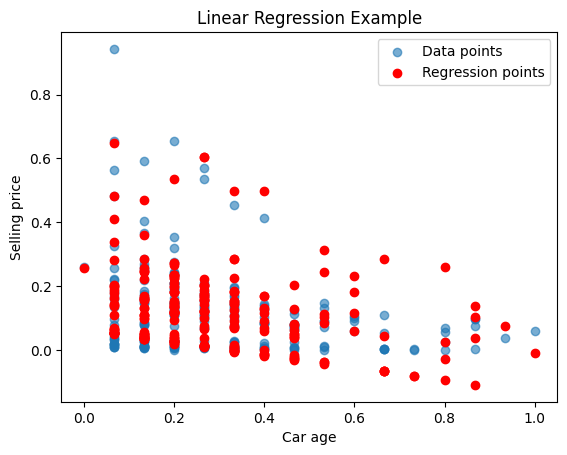

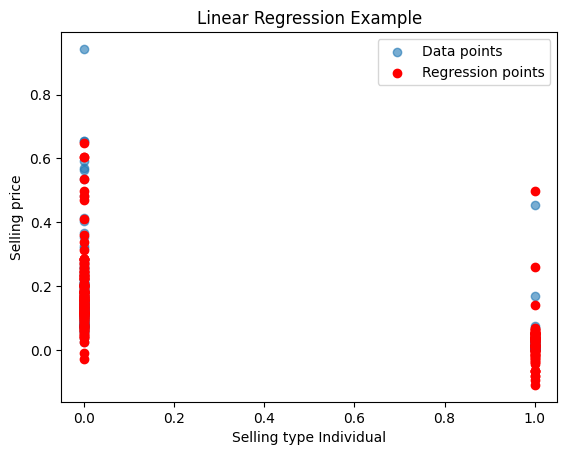

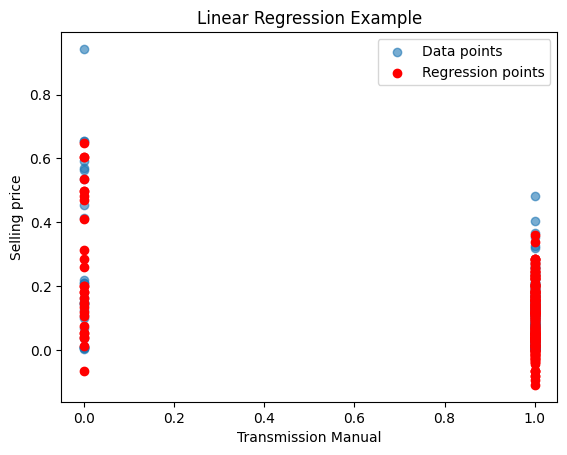

In [22]:
# Display the coefficients
slope = model_lr.coef_[0]
intercept = model_lr.intercept_
print(f"Coefficient (slope): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

# Plot the data points and the regression line
plt.scatter(x_train["Present_Price"], y_train, alpha=0.6, label='Data points')
plt.scatter(x_train["Present_Price"], model_lr.predict(x_train), color='red', label='Regression points')
plt.title('Linear Regression Example')
plt.xlabel('Present price')
plt.ylabel('Selling price')
plt.legend()
plt.show()

# Plot the data points and the regression line
plt.scatter(x_train["Car_age"], y_train, alpha=0.6, label='Data points')
plt.scatter(x_train["Car_age"], model_lr.predict(x_train), color='red', label='Regression points')
plt.title('Linear Regression Example')
plt.xlabel('Car age')
plt.ylabel('Selling price')
plt.legend()
plt.show()

# Plot the data points and the regression line
plt.scatter(x_train["Selling_type_Individual"], y_train, alpha=0.6, label='Data points')
plt.scatter(x_train["Selling_type_Individual"], model_lr.predict(x_train), color='red', label='Regression points')
plt.title('Linear Regression Example')
plt.xlabel('Selling type Individual')
plt.ylabel('Selling price')
plt.legend()
plt.show()

# Plot the data points and the regression line
plt.scatter(x_train["Transmission_Manual"], y_train, alpha=0.6, label='Data points')
plt.scatter(x_train["Transmission_Manual"], model_lr.predict(x_train), color='red', label='Regression points')
plt.title('Linear Regression Example')
plt.xlabel('Transmission Manual')
plt.ylabel('Selling price')
plt.legend()
plt.show()



*   Present Price and selling price almost has linear relationship which is very well explained by linear regression model.
*   For lower car age, model explains well the output.


*   For High selling price, model output does not match very well with the ouput comapred to lower selling price cars.





## Task 4: Data Understanding with Statistics

### Descriptive Statistics:
### ●	Calculate and interpret mean, median, and standard deviation for a given dataset.
### ●	Create visualizations, such as histograms and box plots, to represent the data distribution.


In [23]:
car.describe()

,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000
mean,4.589632,7.541037,36916.752508,0.043478
std,4.984240,8.566332,39015.170352,0.248720
min,0.100000,0.320000,500.000000,0.000000
25%,0.850000,1.200000,15000.000000,0.000000
50%,3.510000,6.100000,32000.000000,0.000000
75%,6.000000,9.840000,48883.500000,0.000000
max,35.000000,92.600000,500000.000000,3.000000


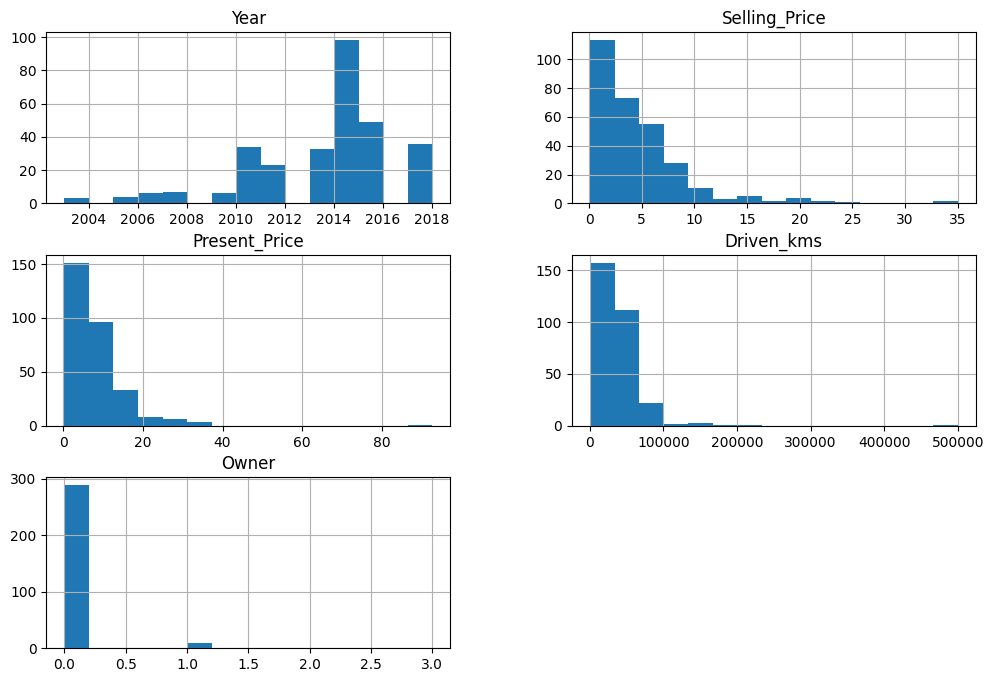

In [24]:
# Create a histogram for the features
car.hist(bins=15, figsize=(12, 8))
plt.show()
#The data is left skewed for year and right skewed for selling price, present price and driven kms.

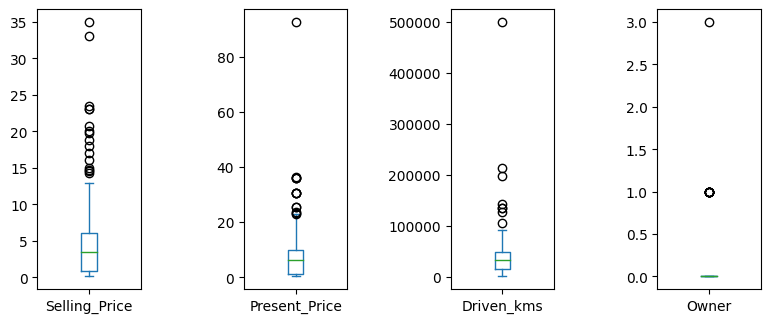

In [25]:
#Box plot
car.plot(kind ='box', subplots = True, layout =(2,5), sharex = False, sharey = False, figsize=(12, 8))
# Add space between subplots horizontally
plt.subplots_adjust(wspace=1)
plt.show()
#all the columns seems to have lot of outliers

### Statistical Visualization:
### ●	Choose one visualization method (e.g., scatter plot or box plot) to represent relationships or trends in a dataset.
### ●	Provide a brief explanation of why the selected visualization is suitable.


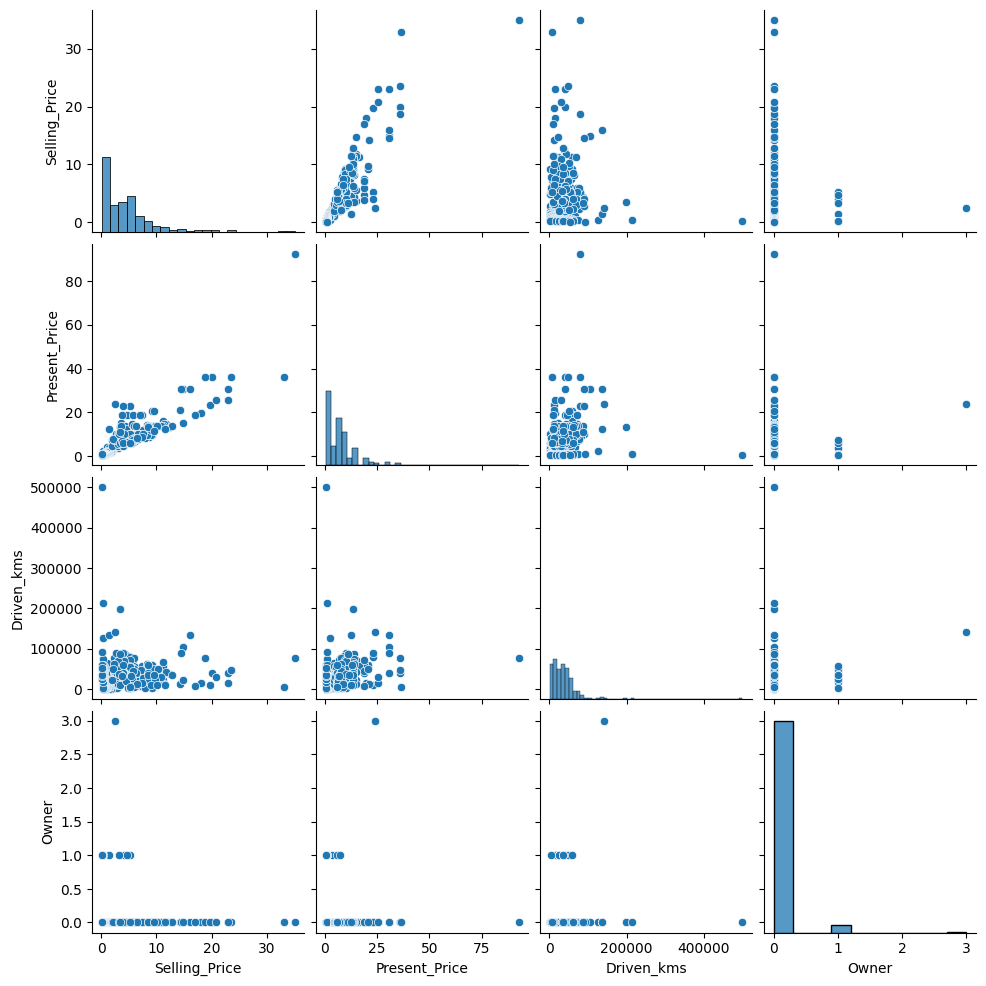

In [26]:
#scatter plot
sns.pairplot(car)
plt.show()


The scatter plot gives a very good idea how each variable is coorlated with other input as well as output variable.

*   Shows a positive strong correlation b/w selling price and present price
*   Very weak positive correlation b/w driven kms and selling price.


*   The car with very large value of driven kms has a very low price.



